## Look at the big picture
1. Aims: 
2. Performance measure: 



## Get the data

### Import the packages and the data

In [66]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pathlib import Path
# Read the CSV file
df = pd.read_csv(
    '/Users/sean/OneDrive - connect.hku.hk/ECOM7126/Assignment/CustomerDataset.csv')

# extra code – code to save the figures as high-res PNGs for the book

IMAGES_PATH = Path() / "images" / "assignment3"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


### Take a Quick Look at the Data Structure

In [67]:
# get a glance of the data
df.head()

,CustomerID,Gender,Age,Income,SpendingScore
0,1,Female,29,499,85
1,2,Female,21,208,81
2,3,Female,27,300,48
3,4,Female,26,458,29
4,5,Male,57,221,4


In [68]:
# get the info of the data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     200 non-null    int64 
 1   Gender         200 non-null    object
 2   Age            200 non-null    int64 
 3   Income         200 non-null    int64 
 4   SpendingScore  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [69]:
df.isnull().sum()

CustomerID       0
Gender           0
Age              0
Income           0
SpendingScore    0
dtype: int64

In [70]:
df.describe()

,CustomerID,Age,Income,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,39.075000,393.630000,50.475000
std,57.879185,14.042626,170.715441,25.765065
min,1.000000,16.000000,93.000000,1.000000
25%,50.750000,29.000000,270.500000,32.750000
50%,100.500000,36.500000,399.500000,50.000000
75%,150.250000,49.000000,501.250000,72.250000
max,200.000000,74.000000,896.000000,99.000000


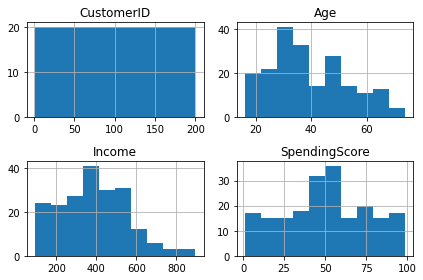

In [71]:
df.hist()
save_fig("hist")  

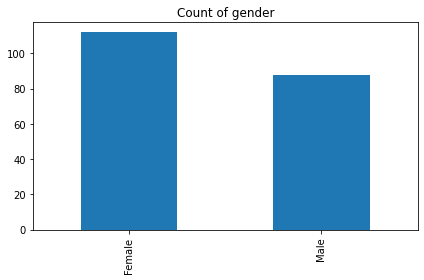

In [72]:
df["Gender"].value_counts().plot(kind='bar')
plt.title('Count of gender')
save_fig("Count of gender")  

### Create Test set

In [73]:
# Random sampling
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

## Prepare the data for ML algotithms


In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer

num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler())
cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))
preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)

/Users/sean/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sean/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sean/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sean/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Use

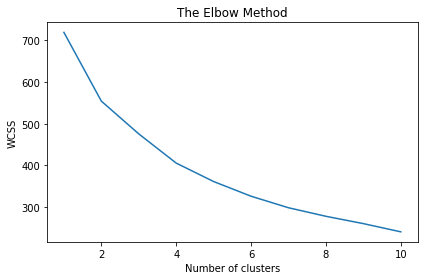

In [75]:
# using elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = make_pipeline(preprocessing,KMeans(n_clusters=i, init='k-means++', random_state=42))
    kmeans.fit(train_set)
    wcss.append(kmeans.named_steps['kmeans'].inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
save_fig("The Elbow Method")


/Users/sean/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sean/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sean/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sean/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Use

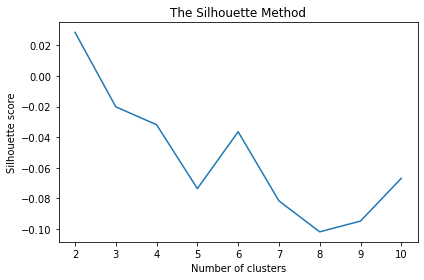

In [76]:
# using silhouette score to find the optimal number of clusters
from sklearn.metrics import silhouette_score
silhouette_scores = []
#use one-hot encoding to convert the categorical data to numerical data
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
train_set_cat_1hot = cat_encoder.fit_transform(train_set[['Gender']])
train_set["Gender"] = train_set_cat_1hot.toarray()
for n_cluster in range(2, 11):
    kmeans = make_pipeline(preprocessing,KMeans(n_clusters=n_cluster, init='k-means++', random_state=42))
    kmeans.fit(train_set)
    silhouette_scores.append(silhouette_score(train_set, kmeans.named_steps['kmeans'].labels_))
plt.plot(range(2, 11), silhouette_scores)
plt.title('The Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
save_fig("The Silhouette Method")


/Users/sean/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


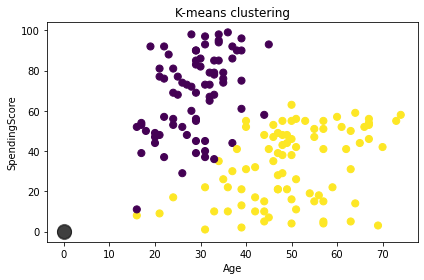

In [80]:
# Plot the cluster centers and the data points on a 2D plane
kmeans = make_pipeline(preprocessing,KMeans(n_clusters=2, init='k-means++', random_state=42))
kmeans.fit(train_set)

labels = kmeans.named_steps['kmeans'].labels_
centers = kmeans.named_steps['kmeans'].cluster_centers_
plt.scatter(train_set['Age'], train_set['SpendingScore'], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
xlabel = 'Age'
ylabel = 'SpendingScore'
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title('K-means clustering')
save_fig("kmeans_Age_SpendingScore")